<a href="https://colab.research.google.com/github/ArkaPrabhaChowdhury/Diabetes_Prediction/blob/main/KNN_and_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN** **Program**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
dataset=pd.read_csv('Car_sales2.csv')
dataset = dataset.drop(['Manufacturer'],axis=1)
dataset = dataset.drop(['Model'],axis=1)
dataset = dataset.drop(['Latest_Launch'],axis=1)
dataset = pd.get_dummies(dataset, drop_first=True)
zero_not_accepted = ["Price_in_thousands","Horsepower","Width","Length","Power_perf_factor","Fuel_Tank_Capacity"]
for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0,np.NaN)
  mean = int(dataset[column].mean(skipna=True))
  dataset[column] = dataset[column].replace(np.NaN,mean)
dataset.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,displacement,Fuel_Tank_Capacity,mpg,Vehicle_type_Passenger,Fuel_Type_Diesel,Fuel_Type_Petrol
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,307.0,24,18,1,0,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,350.0,24,15,1,0,1
2,14.114,18.225,27.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.000000,318.0,15,18,1,0,1
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,304.0,24,16,1,1,0
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,302.0,24,17,1,0,1


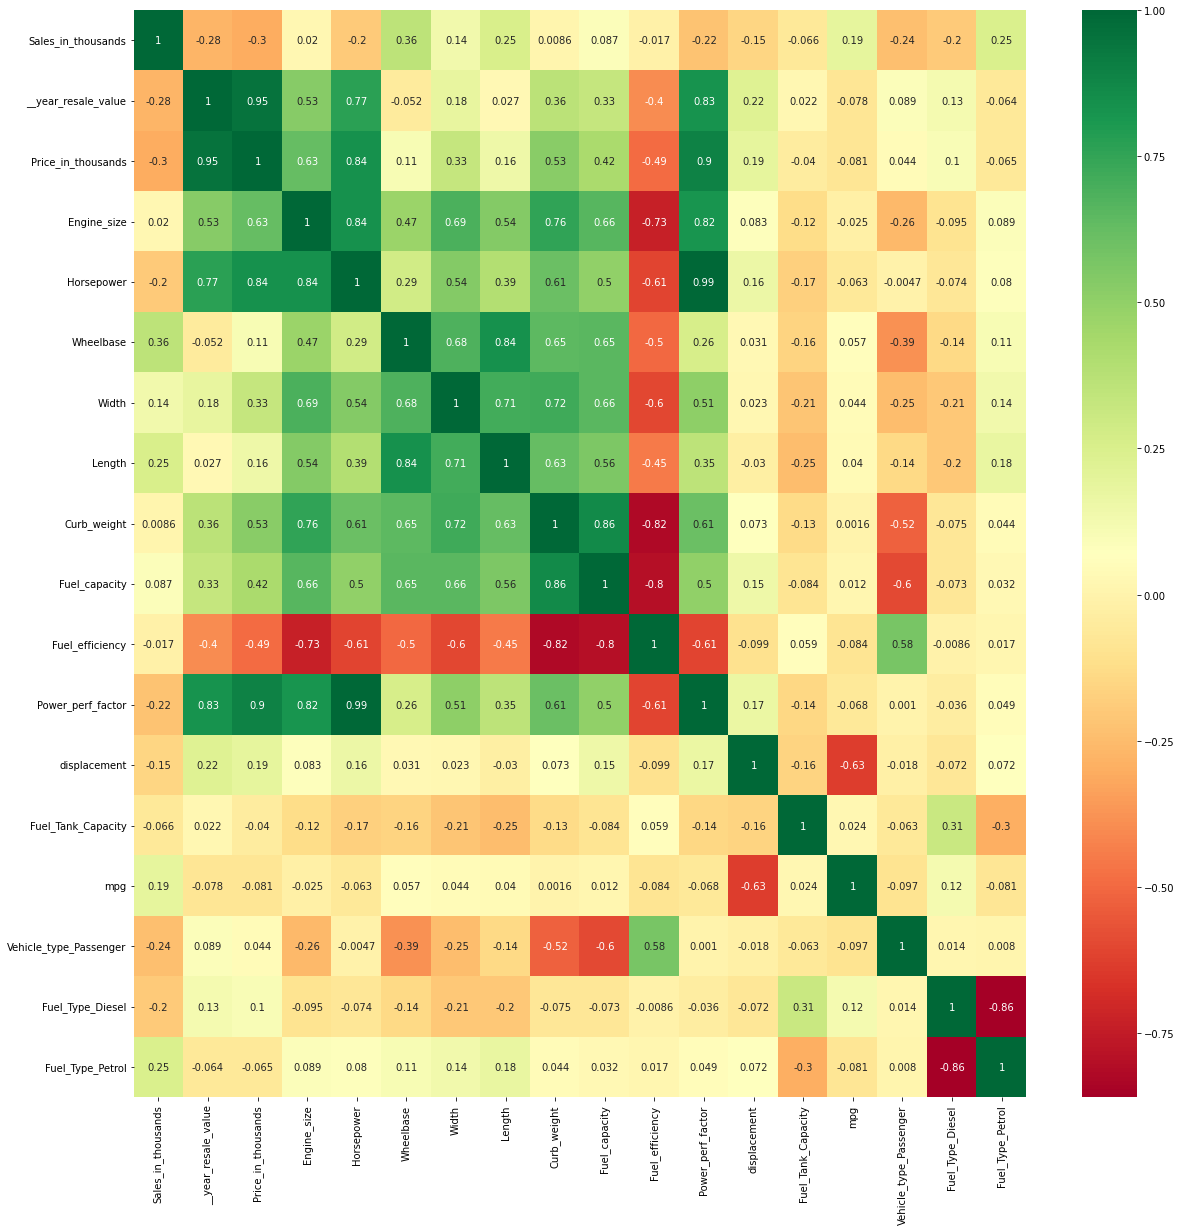

In [ ]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


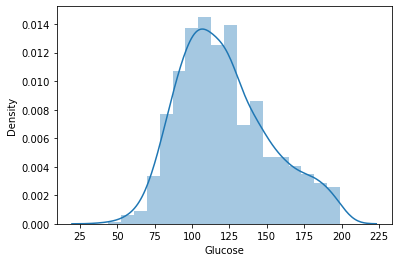

In [ ]:
sns.distplot(dataset['Glucose'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


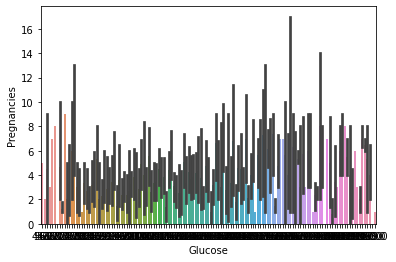

In [ ]:
sns.barplot(dataset['Glucose'], dataset['Pregnancies'])

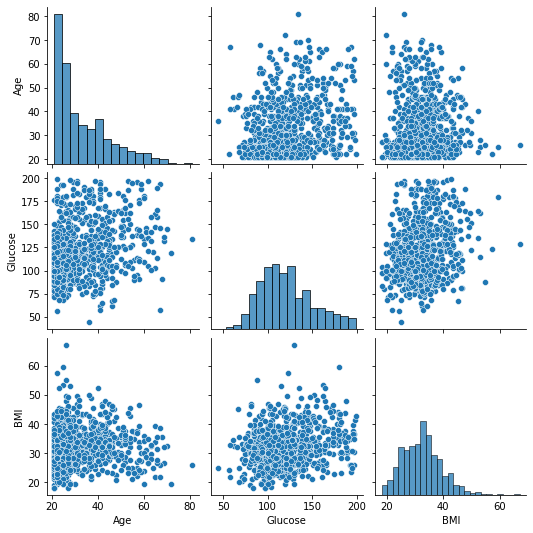

In [ ]:
sns.pairplot(dataset[['Age','Glucose','BMI']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


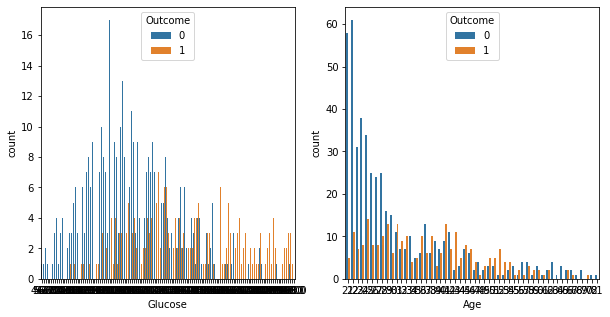

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot('Glucose', hue='Outcome',data=dataset)
plt.subplot(1,2,2)
sns.countplot('Age', hue='Outcome',data=dataset)
plt.subplot(2,2,1)

In [ ]:
feature = ['Pregnancies','Glucose','Age','BMI']

In [ ]:
list(enumerate(feature))

[(0, 'Pregnancies'), (1, 'Glucose'), (2, 'Age'), (3, 'BMI')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

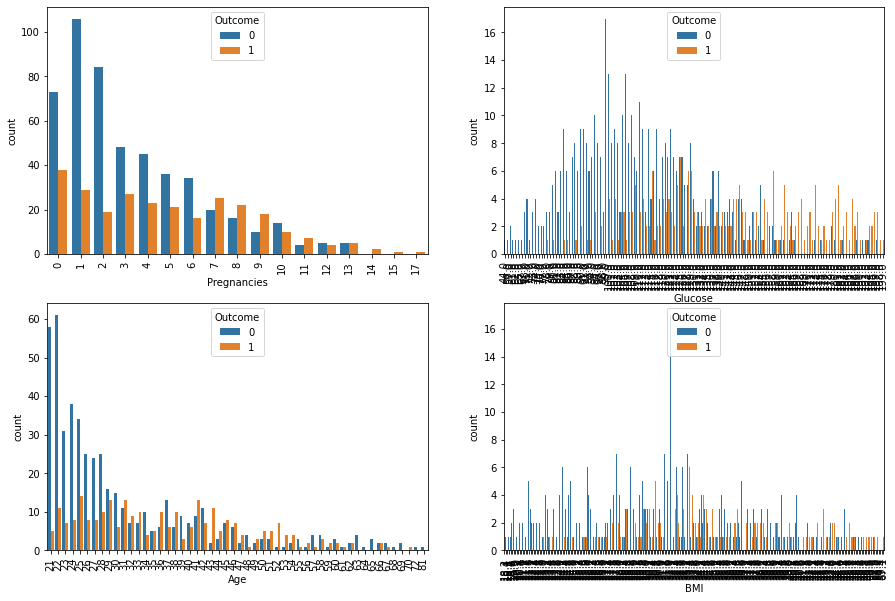

In [ ]:
plt.figure(figsize=(15,10))
for i in enumerate(feature):
  plt.subplot(2,2,i[0]+1)
  sns.countplot(i[1], hue='Outcome',data=dataset)
  plt.xticks(rotation=90)

In [ ]:
x = dataset.iloc[:, lambda k: k.index!=14 and k<18]
y = dataset.iloc[:, 14]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)
x.head()

ValueError: ignored

In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

ValueError: ignored

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [ ]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94 13]
 [15 32]]


In [ ]:
print(f1_score(y_test, y_pred))

0.6956521739130436


In [ ]:
print(accuracy_score(y_test, y_pred)*100,"%")

81.81818181818183 %


**Decision** **Tree**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree 

dataset=pd.read_csv('diabetes.csv')
print(len(dataset))
print(dataset.head())

768
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [ ]:
zero_not_accepted = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0,np.NaN)
  mean = int(dataset[column].mean(skipna=True))
  dataset[column] = dataset[column].replace(np.NaN,mean)
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6    148.0           72.0  ...                     0.627   50        1
1            1     85.0           66.0  ...                     0.351   31        0
2            8    183.0           64.0  ...                     0.672   32        1
3            1     89.0           66.0  ...                     0.167   21        0
4            0    137.0           40.0  ...                     2.288   33        1

[5 rows x 9 columns]


In [ ]:
x = dataset.iloc[:,0:8]
y = dataset.iloc[:, 8]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)


In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=3,min_samples_leaf=5 )
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=0)

In [ ]:
y_pred=clf_entropy.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[93 14]
 [23 24]]


In [ ]:
print(f1_score(y_test,y_pred))

0.5647058823529411


In [ ]:
print("The accuracy is",accuracy_score(y_test,y_pred)*100)

The accuracy is 75.97402597402598


**Random** **Forest**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
np.random.seed(0)

In [ ]:
dataset=pd.read_csv('diabetes.csv')
print(len(dataset))
print(dataset.head())

768
   Pregnancies  Glucose  Age  ...  Insulin  DiabetesPedigreeFunction  Outcome
0            6      148   50  ...        0                     0.627        1
1            1       85   31  ...        0                     0.351        0
2            8      183   32  ...        0                     0.672        1
3            1       89   21  ...       94                     0.167        0
4            0      137   33  ...      168                     2.288        1

[5 rows x 9 columns]


In [ ]:
zero_not_accepted = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0,np.NaN)
  mean = int(dataset[column].mean(skipna=True))
  dataset[column] = dataset[column].replace(np.NaN,mean)
print(dataset.head())

   Pregnancies  Glucose  Age  ...  Insulin  DiabetesPedigreeFunction  Outcome
0            6    148.0   50  ...    155.0                     0.627        1
1            1     85.0   31  ...    155.0                     0.351        0
2            8    183.0   32  ...    155.0                     0.672        1
3            1     89.0   21  ...     94.0                     0.167        0
4            0    137.0   33  ...    168.0                     2.288        1

[5 rows x 9 columns]


In [ ]:
x = dataset.iloc[:,0:8]
y = dataset.iloc[:, 8]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)
print(x_train)


     Pregnancies  Glucose  ...  Insulin  DiabetesPedigreeFunction
603            7    150.0  ...    126.0                     0.692
118            4     97.0  ...    155.0                     0.443
247            0    165.0  ...    680.0                     0.427
157            1    109.0  ...    135.0                     0.833
468            8    120.0  ...    155.0                     0.183
..           ...      ...  ...      ...                       ...
763           10    101.0  ...    180.0                     0.171
192            7    159.0  ...    155.0                     0.383
629            4     94.0  ...    155.0                     0.148
559           11     85.0  ...    155.0                     0.300
684            5    136.0  ...    155.0                     0.640

[614 rows x 8 columns]


In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
clf=RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[92 15]
 [15 32]]


In [ ]:
print(f1_score(y_test,y_pred))

0.6808510638297872


In [ ]:
print("The accuracy is",accuracy_score(y_test,y_pred)*100)

The accuracy is 80.51948051948052


**Navie** **Bayes**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("/content/diabetes (1).csv")
zero_not_accepted = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0,np.NaN)
  mean = int(dataset[column].mean(skipna=True))
  dataset[column] = dataset[column].replace(np.NaN,mean)
x = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(dataset.head())

   Pregnancies  Glucose  Age  ...  Insulin  DiabetesPedigreeFunction  Outcome
0            6    148.0   50  ...    155.0                     0.627        1
1            1     85.0   31  ...    155.0                     0.351        0
2            8    183.0   32  ...    155.0                     0.672        1
3            1     89.0   21  ...     94.0                     0.167        0
4            0    137.0   33  ...    168.0                     2.288        1

[5 rows x 9 columns]


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print(f1_score(y_test, y_pred))
print(ac*100,"%")

[[92 15]
 [18 29]]
0.6373626373626374
78.57142857142857 %


**Support Vector Machine**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("/content/diabetes (1).csv")
zero_not_accepted = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0,np.NaN)
  mean = int(dataset[column].mean(skipna=True))
  dataset[column] = dataset[column].replace(np.NaN,mean)
x = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
dataset.head()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.2)
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
dataset.head()

,Pregnancies,Glucose,Age,BMI,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,6,148.0,50,33.6,72.0,35.0,155.0,0.627,1
1,1,85.0,31,26.6,66.0,29.0,155.0,0.351,0
2,8,183.0,32,23.3,64.0,29.0,155.0,0.672,1
3,1,89.0,21,28.1,66.0,23.0,94.0,0.167,0
4,0,137.0,33,43.1,40.0,35.0,168.0,2.288,1


In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

plt.scatter(x_train[:, 0],x_train[:, 1], c=y_train, cmap='winter')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[97 10]
 [21 26]]


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.6265060240963856


In [ ]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac*100,"%")

79.87012987012987 %


**Logistic Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("/content/diabetes (1).csv")
zero_not_accepted = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0,np.NaN)
  mean = int(dataset[column].mean(skipna=True))
  dataset[column] = dataset[column].replace(np.NaN,mean)
x = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.2)
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(C=1.0,class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,l1_ratio=None, max_iter = 100,
                   multi_class="warn", n_jobs=None,penalty='l2',
                   random_state=0, solver = 'warn', tol = 0.0001, verbose = 0,
                   warm_start = False)

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[97 10]
 [19 28]]


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.6588235294117647


In [ ]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac*100,"%")

81.16883116883116 %
